#Intro

Tugas besar Machine Learning tahap satu. Ditulis oleh Mochammad Ivan Adhyaksa Pradana (NIM 1301184080).

Dataset yang dipilih adalah kendaraan. Pada notebook ini akan dijelaskan cara melakukan clustering pada dataset terpilih, termasuk persiapan datanya (data preparation & cleansing).

#Formulasi Masalah

Tujuan dari dataset kendaraan adalah memprediksi apakah seseorang tertarik atau tidak untuk membeli kendaraan berdasarkaan beberapa atribut. Dataset ini diperoleh dari dosen Machine Learning. Untuk clustering nanti, atribut yang akan di*highlight* adalah Umur dan Lama_Berlangganan. DengaN begitu, kita dapat melihat seperti apa hubungan kedua atribut tersebut dan mendapatkan informasi dari hubungan tersebut.

# Eksplorasi dan Persiapan Data

Dataset kendaraan_train.csv memiliki 285831 records dan 12 atribut. Tipe data untuk tiap-tiap atributnya adalah sebagai berikut (sesuai dengan file readme.txt):

1. id : integer
2. Jenis_Kelamin : Pria, Wanita (Kategorikal)
3. Umur : diskrit
4. SIM : 0 : Tidak punya SIM, 1 : Punya SIM (Kategorikal)
5. Kode_Daerah : Kode area tempat tinggal pelanggan (Kategorikal)
6. Sudah_Asuransi : 1 : Pelanggan sudah memiliki asuransi kendaraan, 0 : Pelanggan belum memiliki asuransi kendaraan (Kategorikal)
7. Umur_Kendaraan : Umur kendaraan (Kategorikal)
8. Kendaraan_Rusak : 1 : Kendaraan pernah rusak sebelumnya. 0 : Kendaraan belum pernah rusak. (Kategorikal)
9. Premi : float, continuous
10. Kanal_Penjualan : Kode kanal untuk menghubungi pelanggan (email, telpon, dll) (Kategorikal)
11. Lama_Berlangganan : continuous
12. Tertarik : 1 : Pelanggan tertarik, 0 : Pelanggan tidak tertarik (Kelas, Kategorikal)

In [3]:
import pandas as pd

data = pd.read_csv('kendaraan_train.csv')

print(f"Jumlah record: {data.shape[0]}")

Jumlah record: 285831


In [4]:
data.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


Dapat dilihat bahwa terdapat beberapa atribut kategorikal. Nantinya, nilai untuk atribut-atribut tersebut akan dikonversi menjadi angka untuk perhitungan jarak. Selain itu, akan dilakukan normalisasi pada dataset, melihat banyak atribut yang memiliki range yang besarnya berbeda.

## Missing Values

Dataset ini memiliki missing values. Detailnya dapat dilihat sebagai berikut:

In [5]:
data.isna().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

Missing values akan diisi berdasarkan atributnya. Umur, premi dan lama berlangganan akan diisi dengan mean, sedangkan sisanya diisi dengan modus.

In [6]:
for column in ['Jenis_Kelamin', 'SIM', 'Kode_Daerah', 'Sudah_Asuransi', 'Umur_Kendaraan', 'Kendaraan_Rusak', 'Kanal_Penjualan']:
  data[column].fillna(data[column].mode()[0], inplace=True)

for column in ['Umur', 'Premi', 'Lama_Berlangganan']:
  data[column].fillna(data[column].mean(), inplace=True)

data.isna().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

Missing values sudah diisi dengan mean dan modus sehingga tidak ada lagi record dengan missing values.

## Mengubah Nilai Kategorikal Menjadi Angka

Atribut Jenis kelamin, umur kendaraan, dan kendaraan rusak memiliki nilai kategorikal. Nilai-nilai tersebut akan diubah menjadi angka agar dapat diolah, baik saat visualisasi maupun clustering.

Untuk atribut jenis kelamin, nilai Pria akan diubah menjadi 1 sedangkan Wanita menjadi 0.

Untuk atribut umur kendaraan, 1-2 tahun menjadi 0, <1 tahun diubah menjadi 1, dan >2 menjadi 2.

Untuk atribut kendaraan rusak, tidak diubah menjadi 0 dan pernah menjadi 1.

In [7]:
data['Jenis_Kelamin'] = pd.factorize(data['Jenis_Kelamin'])[0]
data['Umur_Kendaraan'] = pd.factorize(data['Umur_Kendaraan'], sort=True)[0]
data['Kendaraan_Rusak'] = pd.factorize(data['Kendaraan_Rusak'])[0]
data.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,0,30.0,1.0,33.0,1.0,1,0,28029.0,152.0,97.0,0
1,2,1,48.0,1.0,39.0,0.0,2,1,25800.0,29.0,158.0,0
2,3,1,21.0,1.0,46.0,1.0,1,0,32733.0,160.0,119.0,0
3,4,0,58.0,1.0,48.0,0.0,0,0,2630.0,124.0,63.0,0
4,5,1,50.0,1.0,35.0,0.0,2,1,34857.0,88.0,194.0,0


## Simple Statistics

Simple statistics untuk masing-masing atribut adalah sebagai berikut.

In [8]:
for column in data.columns:
  if column == 'Umur' or column == 'Premi' or column == 'Lama_Berlangganan':
    print(f"{column}:\nAverage = {data[column].mean()}")
    print(f"Minimum = {data[column].min()}")
    print(f"Maximum = {data[column].max()}")
    print(f"Standard Deviation = {data[column].std()}\n")

Umur:
Average = 38.84433595835354
Minimum = 20.0
Maximum = 85.0
Standard Deviation = 15.131607903275446

Premi:
Average = 30536.68347205901
Minimum = 2630.0
Maximum = 540165.0
Standard Deviation = 16712.080404900575

Lama_Berlangganan:
Average = 154.2863018183765
Minimum = 10.0
Maximum = 299.0
Standard Deviation = 81.62068358499727



## Distribution

Distribusi atribut pada dataset dapat dilihat sebagai berikut.

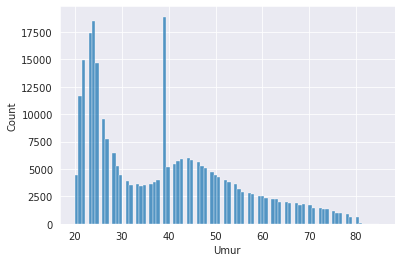

In [9]:
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

ax = sns.histplot(data, x='Umur')

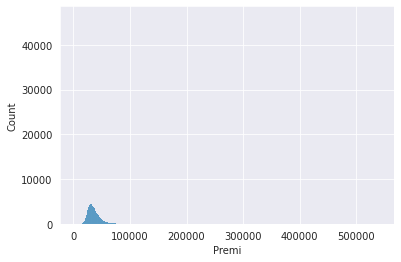

In [10]:
ax = sns.histplot(data, x='Premi')

histogram premi terlihat seperti di atas karena terdapat outlier.

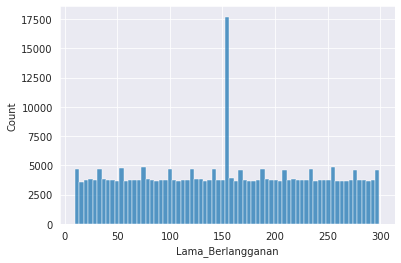

In [11]:
ax = sns.histplot(data, x='Lama_Berlangganan')

## Correlation

Korelasi antar atribut dataset adalah sebagai berikut.

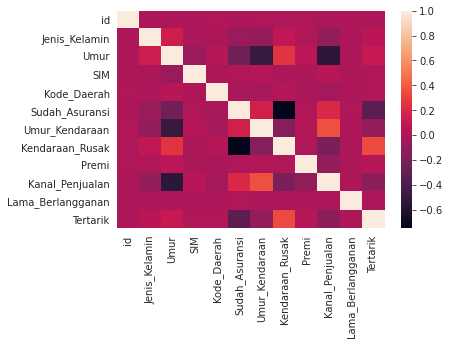

In [12]:
correlation = data.corr()

ax = sns.heatmap(correlation,
                xticklabels=correlation.columns,
                yticklabels=correlation.columns)

Atribut Sudah_Asuransi memiliki korelasi terkecil dengan atribut Tertarik. Sedangkan Kendaraan_Rusak memiliki korelasi tertinggi.

Dapat dilihat juga bahwa Umur memiliki korelasi tertinggi dengan Kendaraan_Rusak. Sedangkan korelasi terendahnya adalah dengan Umur_Kendaraan dan Kanal_Penjualan.
Sedangkan, atribut Lama_Berlangganan memiliki korelasi yang stabil dengan atribut lainnya.


## Outlier

Berikut boxplot untuk mengecek outlier pada atribut urmur, premi, dan lama berlangganan

<Figure size 4320x4320 with 0 Axes>

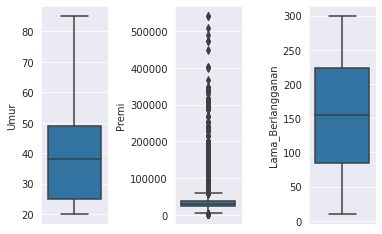

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(60, 60))
f, axes = plt.subplots(1, 3)
sns.boxplot(y=data['Umur'], ax=axes[0])
sns.boxplot(y=data['Premi'], ax=axes[1])
sns.boxplot(y=data['Lama_Berlangganan'], ax=axes[2])
plt.subplots_adjust(wspace=1)

Terlihat jelas bahwa Premi memiliki outlier yang sangat banyak. Meskipun begitu, outlier premi tidak akan didrop ataupun diubah karena wajar bagi orang-orang untuk memiliki premi yang berbeda dengan selisih yang besar.

## Duplicates

Dataset ini tidak memiliki duplicate record.

In [14]:
data.duplicated().sum()

0

## Feature Selection

Karena observasi ini bertujuan untuk melihat hubungan antara Umur dan Lama_Berlangganan dalam clustering, maka kedua fitur tersebut dipilih. Selain itu, fitur Id dapat didrop juga karena atribut ini hanya sebagai identitas unik record dan tidak berpengaruh terhadap pengelompokan data.

In [15]:
del data['id']
data.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,30.0,1.0,33.0,1.0,1,0,28029.0,152.0,97.0,0
1,1,48.0,1.0,39.0,0.0,2,1,25800.0,29.0,158.0,0
2,1,21.0,1.0,46.0,1.0,1,0,32733.0,160.0,119.0,0
3,0,58.0,1.0,48.0,0.0,0,0,2630.0,124.0,63.0,0
4,1,50.0,1.0,35.0,0.0,2,1,34857.0,88.0,194.0,0


## Min-Max Scaling

Tiap atribut memiliki range nilai yang berbeda-beda, dengan atribut Premi yang sangat mendomninasi, yaitu bernilai lebih dari ratusan ribu. Maka dari itu, akan dilakukan normalisasi untuk beberapa atribut. Atribut yang akan dinormalisasi adalah umur, kode daerah, premi, kanal penjualan dan lama berlangganan.

In [16]:
normalized_data = data.copy()

for column in normalized_data.columns:
  if column == 'Umur' or column == 'Premi' or column =='Lama_Berlangganan':
    minimum = normalized_data[column].min()
    maximum = normalized_data[column].max()
    normalized_data[column] = (normalized_data[column] - minimum)/(maximum - minimum)

normalized_data.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,0.153846,1.0,33.0,1.0,1,0,0.047251,152.0,0.301038,0
1,1,0.430769,1.0,39.0,0.0,2,1,0.043104,29.0,0.512111,0
2,1,0.015385,1.0,46.0,1.0,1,0,0.056002,160.0,0.377163,0
3,0,0.584615,1.0,48.0,0.0,0,0,0.000000,124.0,0.183391,0
4,1,0.461538,1.0,35.0,0.0,2,1,0.059953,88.0,0.636678,0


# Pemodelan K-Means Clustering

Bagian ini adalah proses pemodelan Clustering. Jenis clustering yang dipakai adalah K-Means Clustering. Pada saat membangun model, pertama-tama, nilai K yang dipakai adalah 2 karena Kelas pada dataset ini adalah 2 (Tertarik dan tidak tertarik). Lalu, pada bagian eksperimen, akan digunakan elbow method untuk menentukan nilai K terbaik dan hasilnya akan dibandingkan.

## K-Means Clustering Model

In [17]:
import numpy as np
import time

def euclidean_distance(x1,x2):
  return np.sqrt(np.sum((x1-x2)**2))


class KMeans:

  def __init__(self, K, max_iters):
    self.K = K
    self.current_iters = 0
    self.max_iters = max_iters
    
    # create K list to contain list of records based on clusters
    self.clusters = [[] for _ in range(self.K)]
    # list of centroids
    self.centroids = []


  def clustering(self, X):
    start = time.time()
    # X is the dataframe used
    self.X = X
    self.n_samples, self.n_features = X.shape

    # initialize centroids randomly
    random_sample_idx = np.random.choice(self.n_samples, self.K, replace=False)
    self.centroids = [self.X.loc[idx] for idx in random_sample_idx]
    print('initial centroids set')

    # repeat until no new centroid or max iteration reached
    for _ in range(self.max_iters):
      # update clusters
      self.clusters = self._create_clusters(self.centroids)
      # update centroids
      centroids_old = self.centroids
      self.centroids = self._get_centroids(self.clusters)

      # an iteration done
      self.current_iters += 1
      # check if converged
      if self._is_converged(centroids_old, self.centroids):
        print('centroids converged')
        break

    # return cluster labels
    end = time.time()
    print(f'clustering stops at {self.current_iters} iteration(s)')
    print(f"Time: {end-start}s")
    return self._get_cluster_labels(self.clusters)


  def plot(self, x_label, y_label):
    fig, ax = plt.subplots(figsize=(16,16))

    for i, idx in enumerate(self.clusters):
      point = self.X.loc[idx].T
      x = point.iloc[0]
      y = point.iloc[1]
      ax.scatter(x,y)

    # x marker for centroids
    for point in self.centroids:
      ax.scatter(*point, marker="x", color="black", linewidth=2)

    plt.title(f"K-Means clustering with K = {self.K}")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()


  # helper functions
  def _create_clusters(self, centroids):
    clusters = [[] for _ in range(self.K)]
    for idx in range(len(self.X)):
      centroid_idx = self._closest_centroid(self.X.loc[idx], centroids)
      clusters[centroid_idx].append(idx)

    return clusters


  def _closest_centroid(self, sample, centroids):
    distances = [euclidean_distance(sample, centroid) for centroid in centroids]
    closest_idx = np.argmin(distances)
    return closest_idx


  def _get_centroids(self, clusters):
    centroids = np.zeros((self.K, self.n_features))
    for cluster_idx, cluster in enumerate(clusters):
      cluster_mean = np.mean(self.X.loc[cluster], axis=0)
      centroids[cluster_idx] = cluster_mean
    
    return centroids


  def _is_converged(self, centroids_old, centroids):
    distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
    return sum(distances) == 0


  def _get_cluster_labels(self, clusters):
    labels = np.empty(self.n_samples)
    for cluster_idx, cluster in enumerate(clusters):
      for sample_idx in cluster:
        labels[sample_idx] = cluster_idx

    return labels

## SSE

Evaluasi kualitas clustering menggunakan SSE

In [18]:
def sse(X, clusters, centroids):
  sse_val = 0
  for i in range(len(centroids)):
    for j in clusters[i]:
      sse_val += np.sum(X.loc[j] - centroids[i])**2
  
  return sse_val

## Running & Evaluation

K-Means akan dicoba untuk dirun dengan ketentuan maximum iteration 5 dan K = 2. Dataframe yang menjadi input adalah Umur:Lama_Berlangganan.

### Clustering Umur:Lama_Berlangganan

In [19]:
km1 = KMeans(2, max_iters=5)
df1 = pd.concat([normalized_data['Umur'], normalized_data['Lama_Berlangganan']], axis=1)
prediction_labels1 = km1.clustering(df1)

initial centroids set
clustering stops at 5 iteration(s)
Time: 1592.4513387680054s


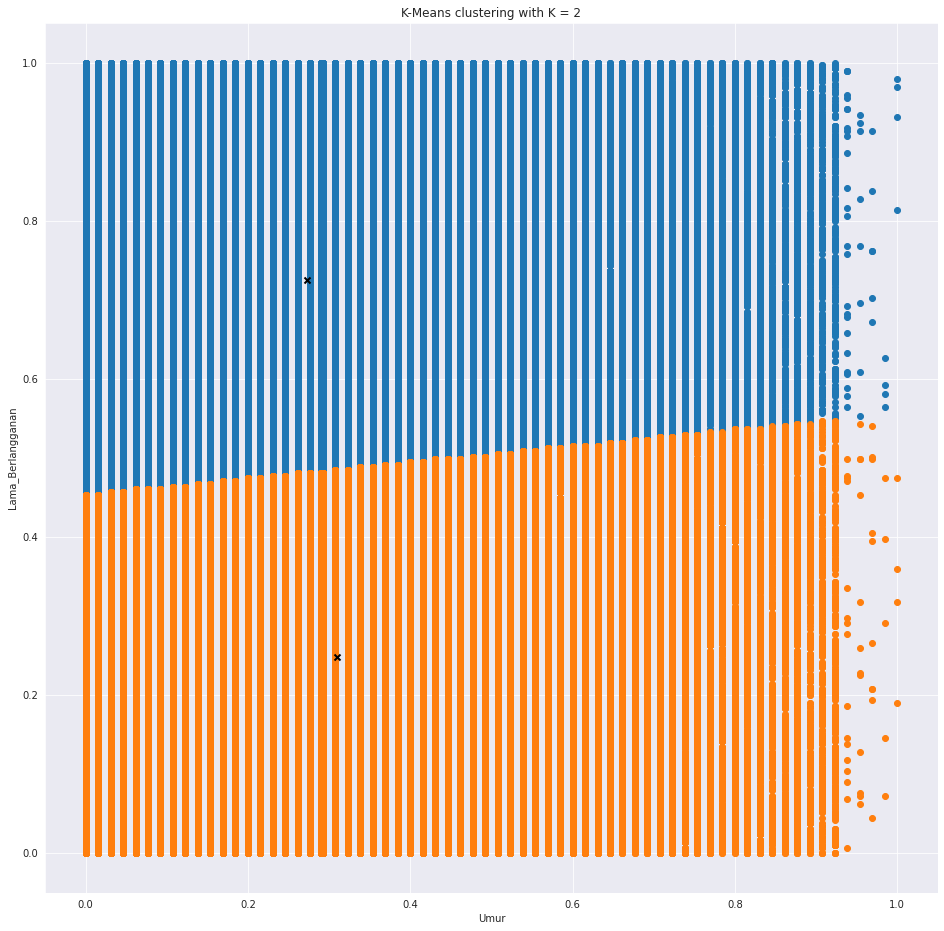

In [ ]:
km1.plot("Umur","Lama_Berlangganan")

In [ ]:
print(f"SSE clustering Umur:Lama_Berlangganan = {sse(df1, km1.clusters, km1.centroids)}")

SSE clustering Umur:Lama_Berlangganan = 24492.208382227836


Dari hasil running, didapat sse sebesar 24492.208382227836. Artinya, nilai errornya cukup besar. Namun, dengan record sebanyak 285831, nilai sse tersebut dapat dimaklumi.

Dari scatter plot yang dihasilkan, dapat dilihat bahwa persebaran datanya sangat merata. Artinya, pada tiap range Umur, terdapat orang untuk masing-masing range Lama_Berlanggganan. Pengecualian ada di range umur tertinggi/tertua. Data pada area tersebut tidak padat.


# Eksperimen

Eksperimen dilakukan dengan membandingkan nilai K yang dipakai. Untuk melihat nilai K terbaik, elbow method digunakan untuk mencari nilai tersebut. Selanjutnya, akan dibandingkan juga hasilnya dengan nilai K pada running utama, yaitu 2.

## Elbow Method

Model K-Means Clustering yang sudah dibuat akan diuji menggunakan elbow method. Range nilai K yang dipakai adalah 1 sampai 6

In [ ]:
sse_list = []
kmean_list = []

for i in range(6):
  k = KMeans(K=i+1, max_iters=2)
  kmean_list.append(k)

In [ ]:
kmean_list

In [ ]:
# K = 1
k = kmean_list[0]
k.clustering(df1)

initial centroids set
centroids converged
clustering stops at 2 iteration(s)
Time: 400.67143058776855s


array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
# K = 2
k2 = kmean_list[1]
k2.clustering(df1)

initial centroids set
clustering stops at 2 iteration(s)
Time: 682.4868290424347s


array([1., 1., 1., ..., 1., 1., 0.])

In [ ]:
# K = 3
k3 = kmean_list[2]
k3.clustering(df1)

initial centroids set
clustering stops at 2 iteration(s)
Time: 966.0221121311188s


array([1., 0., 1., ..., 2., 0., 1.])

In [ ]:
# K = 4
k4 = kmean_list[3]
k4.clustering(df1)

initial centroids set
clustering stops at 2 iteration(s)
Time: 1246.7301561832428s


array([2., 1., 2., ..., 0., 3., 2.])

In [ ]:
# K = 5
k5 = kmean_list[4]
k5.clustering(df1)

initial centroids set
clustering stops at 2 iteration(s)
Time: 1531.3399922847748s


array([2., 1., 2., ..., 3., 1., 0.])

In [ ]:
# K = 6
k6 = kmean_list[5]
k6.clustering(df1)

initial centroids set
clustering stops at 2 iteration(s)
Time: 1807.7518169879913s


array([5., 4., 2., ..., 1., 0., 5.])

In [ ]:
sse_list.append(sse(df1, k.clusters, k.centroids))
sse_list.append(sse(df1, k2.clusters, k2.centroids))
sse_list.append(sse(df1, k3.clusters, k3.centroids))
sse_list.append(sse(df1, k4.clusters, k4.centroids))
sse_list.append(sse(df1, k5.clusters, k5.centroids))
sse_list.append(sse(df1, k6.clusters, k6.centroids))

sse_list

[38294.09223349738,
 36008.84838928792,
 18254.77379484216,
 12562.330315817524,
 9999.831855457915,
 8139.13241648486]

In [ ]:
# K = 7
k7 = KMeans(K=7, max_iters=2)
k7.clustering(df1)

initial centroids set
clustering stops at 2 iteration(s)
Time: 2092.4238686561584s


array([0., 3., 0., ..., 6., 3., 5.])

In [ ]:
sse_list.append(sse(df1, k7.clusters, k7.centroids))

### Graph Elbow Method

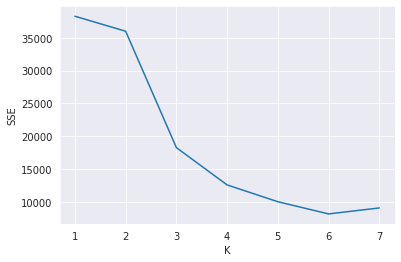

In [ ]:
x = [1, 2, 3, 4, 5, 6, 7]
y = sse_list

plt.figure()
plt.plot(x,y)
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

### Graph Waktu

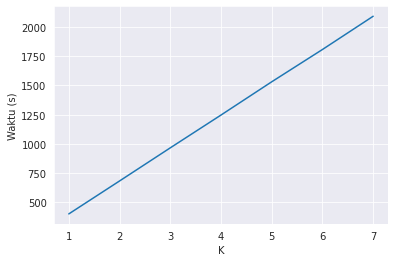

In [ ]:
x = [1, 2, 3, 4, 5, 6, 7]
y = [400.67143058776855, 682.4868290424347, 966.0221121311188, 1246.7301561832428, 1531.3399922847748, 1807.7518169879913, 2092.4238686561584]

plt.figure()
plt.plot(x,y)
plt.xlabel('K')
plt.ylabel('Waktu (s)')
plt.show()

In [ ]:
print(f"SSE K6 = {sse_list[5]}")

SSE K6 = 8139.13241648486


Jadi, nilai K yang terbaik adalah 6

# Clustering dengan K Terbaik

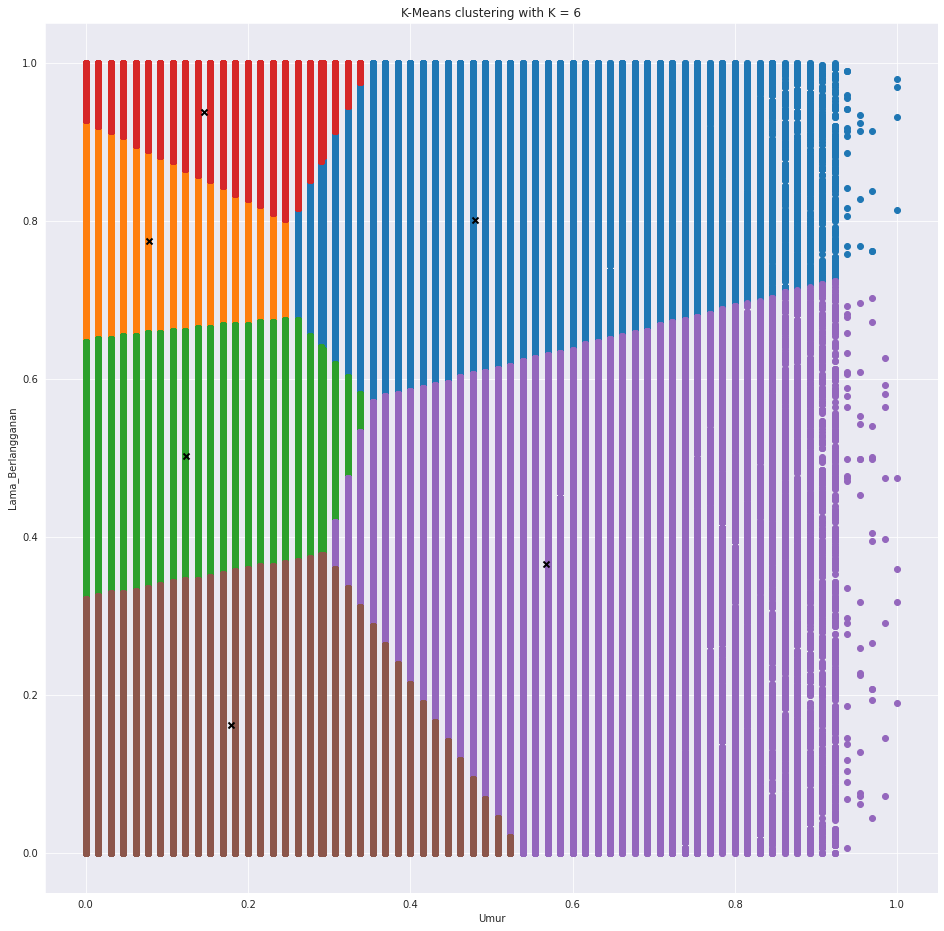

In [ ]:
k6.plot('Umur', 'Lama_Berlangganan')

# Dataset yang Sudah Diolah

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
normalized_data.to_csv('/drive/My Drive/openme/datadiolah.csv')

# Kesimpulan
Dari penjelasan di atas, dapat disimpulkan bahwa kualitas model K-Means Clustering dipengaruhi oleh nilai K yang digunakan. Semakin tinggi nilai K-nya, maka semakin tinggi juga kualitas model yang dibangun, ditandai dengan nilai SSE yang kecil.

Untuk mencari nilai K terbaik, dapat dengan menggunakan elbow method. Nilai K terbaik untuk model yang dibangun adalah 6. Selain itu, semakin besar nilai K-nya, waktu eksekusi algoritma pun juga semakin lama.


# Saran
•	Fungsi plot pada kelas KMeans dapat ditambahkan cara untuk melacak posisi centroid (x) sebelumnya agar visualisasi clusteringnya lebih komprehensif.

•	Dengan penggunaan komputer, platform atau mesin yang lebih kuat, diharapkan iterasi proses running bisa diperbanyak agar dapat dilihat kapan centroid bisa converged (tidak berpindah lagi).

•	Clustering dapat dicoba untuk beberapa set atribut lainnya, seperti umur dengan premi dan premi dengan lama berlangganan, untuk menarik informasi lain dari dataset yang ada.

# Referensi
Python Engineer (2019). *K-Means Clustering in Python - Machine Learning From Scratch 12 - Python Tutorial* [online] https://youtu.be/vtuH4VRq1AU

Siraj Raval (2017). *K-Means Clustering - The Math of Intelligence (Week 3)* [online] https://youtu.be/9991JlKnFmk

In [21]:
print(prediction_labels1)
print(len(prediction_labels1))

[1. 0. 1. ... 1. 0. 0.]
285831


In [23]:
data2 = pd.read_csv('kendaraan_train.csv')
data2.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [25]:
data2.dropna(inplace=True)
data2.shape[0]

171068

In [27]:
print(285831 - 171068)
print(114763/285831)

114763
0.4015064846010405
